<a href="https://colab.research.google.com/github/tcruz88/CNN_project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


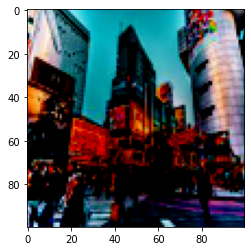

[1. 0.]


In [38]:
#image data shape (n, width, height, rgb value)

X = [] # Images
Y = [] # Categories

folder_pedestrian = 'pedestrian'
folder_road = 'road'

name_encode = {"pedestrian":0, "road":1}

def images_to_array(folder, name):
    for image in os.listdir(folder):
        loaded_image = Image.open(os.path.join(folder, image))
        resized_image = Image.Image.resize(loaded_image, [100,100])
        image_array = np.array(resized_image)
        X.append(image_array)

        Y.append(name_encode[name])

def show_image(index):
    plt.imshow(X[index])
    plt.show()
    print(Y[index])

images_to_array(folder_pedestrian, "pedestrian")
images_to_array(folder_road, "road")

Y = to_categorical(Y, num_classes=2)
X = (np.array(X) - 127.5) / 127.5

show_image(6)

In [41]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (5,5), padding='same',activation='relu', input_shape=(100,100,3) ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 100)       80100     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 100)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 100)       250100    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14400)            